In [1]:
# Step 1: Load Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

# Extract the filename
filename = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(filename)

Saving House_price_data_california.csv to House_price_data_california.csv


In [3]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
                                        property_url  property_id  listing_id  \
0  https://www.realtor.com/rentals/details/55327-...   1804427380  2938212731   
1  https://www.realtor.com/rentals/details/131-Gr...   2453996480  2950818515   
2  https://www.realtor.com/rentals/details/2011-V...   9123013490  2950811324   
3  https://www.realtor.com/rentals/details/Tradan...   9032491360  2950816169   
4  https://www.realtor.com/rentals/details/78341-...   2584873430  2950749756   

    mls     mls_id    status  \
0  TRBO      74707  FOR_RENT   
1  TRBO    1068929  FOR_RENT   
2  AVAL   60601360  FOR_RENT   
3  AVAL   60596209  FOR_RENT   
4  PDCA  219088363  FOR_RENT   

                                                text          style  \
0  Beautiful Lake Views. Fully remodeled Condo in...         CONDOS   
1  Beautiful and spacious, 2-bedroom, 1-bath unit...  SINGLE_FAMILY   
2  Amazing 6 unit Victorian Studio/Junior One All...      APARTMENT   
3  Are 

In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22418 entries, 0 to 22417
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_url      22418 non-null  object 
 1   property_id       22418 non-null  int64  
 2   listing_id        22418 non-null  int64  
 3   mls               22418 non-null  object 
 4   mls_id            22418 non-null  object 
 5   status            22418 non-null  object 
 6   text              17715 non-null  object 
 7   style             22418 non-null  object 
 8   full_street_line  22330 non-null  object 
 9   street            22298 non-null  object 
 10  unit              5213 non-null   object 
 11  city              22416 non-null  object 
 12  state             22418 non-null  object 
 13  zip_code          22415 non-null  float64
 14  beds              12519 non-null  float64
 15  full_baths        12373 non-null  float64
 16  half_baths        2927 no

In [5]:
numeric_cols = ['beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
                'list_price', 'sold_price', 'price_per_sqft', 'lot_sqft']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("\nFirst 5 Rows After Numeric Conversion:")
print(df[numeric_cols].head())



First 5 Rows After Numeric Conversion:
   beds  full_baths  half_baths    sqft  year_built  list_price  sold_price  \
0   3.0         2.0         NaN  1525.0      1988.0      3000.0    253000.0   
1   2.0         1.0         NaN  1000.0         NaN      3300.0    590000.0   
2   0.0         1.0         NaN   710.0         NaN      2800.0         NaN   
3   1.0         1.0         NaN   990.0         NaN      2300.0         NaN   
4   0.0         NaN         NaN  1322.0      1995.0      3000.0    121500.0   

   price_per_sqft  lot_sqft  
0             2.0       NaN  
1             3.0       NaN  
2             4.0       NaN  
3             2.0       NaN  
4             2.0   54450.0  


In [6]:
# Step 6: Check for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values per Column:
builder_name        22418
builder_id          22418
half_baths          19491
agent_nrds_id       18764
broker_id           18187
broker_name         17482
unit                17205
parking_garage      16676
hoa_fee             16636
office_id           16362
office_email        15424
lot_sqft            14688
agent_id            14538
stories             13621
agent_phones        13581
agent_email         13487
office_phones       13456
agent_name          13151
agent_mls_set       13151
office_mls_set      13093
office_name         13087
list_price_max      12623
list_price_min      12582
year_built          12149
estimated_value     10903
sold_price          10809
price_per_sqft      10808
last_sold_date      10807
sqft                10803
full_baths          10045
beds                 9899
list_price           9888
assessed_value       9210
text                 4703
neighborhoods        4550
primary_photo        1617
alt_photos           1617
nearby_sch

In [7]:
# Fill numerical columns with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = ['status', 'style', 'city', 'state']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 6.2: Display After Handling Missing Values
print("\nMissing Values per Column After Handling:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values per Column After Handling:
builder_name        22418
builder_id          22418
agent_nrds_id       18764
broker_id           18187
broker_name         17482
unit                17205
parking_garage      16676
hoa_fee             16636
office_id           16362
office_email        15424
agent_id            14538
stories             13621
agent_phones        13581
agent_email         13487
office_phones       13456
agent_name          13151
agent_mls_set       13151
office_mls_set      13093
office_name         13087
list_price_max      12623
list_price_min      12582
estimated_value     10903
last_sold_date      10807
assessed_value       9210
text                 4703
neighborhoods        4550
alt_photos           1617
primary_photo        1617
nearby_schools        511
fips_code             510
latitude              508
longitude             508
street                120
full_street_line       88
county                  6
zip_code                3
property_url         

<ipython-input-7-e5858323337a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-e5858323337a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [8]:
# Step 7: Check for Duplicate Entries
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Entries: {duplicate_count}")

# Drop duplicates (if necessary)
df = df.drop_duplicates()


Number of Duplicate Entries: 810


In [9]:
# Step 8: Summary Statistics
print("\nSummary Statistics for Numerical Features:")
print(df[numeric_cols].describe())



Summary Statistics for Numerical Features:
               beds    full_baths    half_baths          sqft    year_built  \
count  21608.000000  21608.000000  21608.000000  21608.000000  21608.000000   
mean       2.358710      2.068215      1.008562   1627.015966   1984.642632   
std        1.459701      1.174848      0.123848   1473.674599     19.754813   
min        0.000000      1.000000      1.000000    100.000000   1880.000000   
25%        2.000000      2.000000      1.000000   1328.000000   1986.000000   
50%        2.000000      2.000000      1.000000   1400.000000   1986.000000   
75%        3.000000      2.000000      1.000000   1491.000000   1986.000000   
max      120.000000     61.000000      7.000000  78352.000000   2027.000000   

         list_price    sold_price  price_per_sqft      lot_sqft  
count  2.160800e+04  2.160800e+04    21608.000000  2.160800e+04  
mean   6.674086e+03  2.878813e+06        4.047945  1.001908e+06  
std    6.820037e+04  1.726904e+07       48.203

<Figure size 1200x600 with 0 Axes>

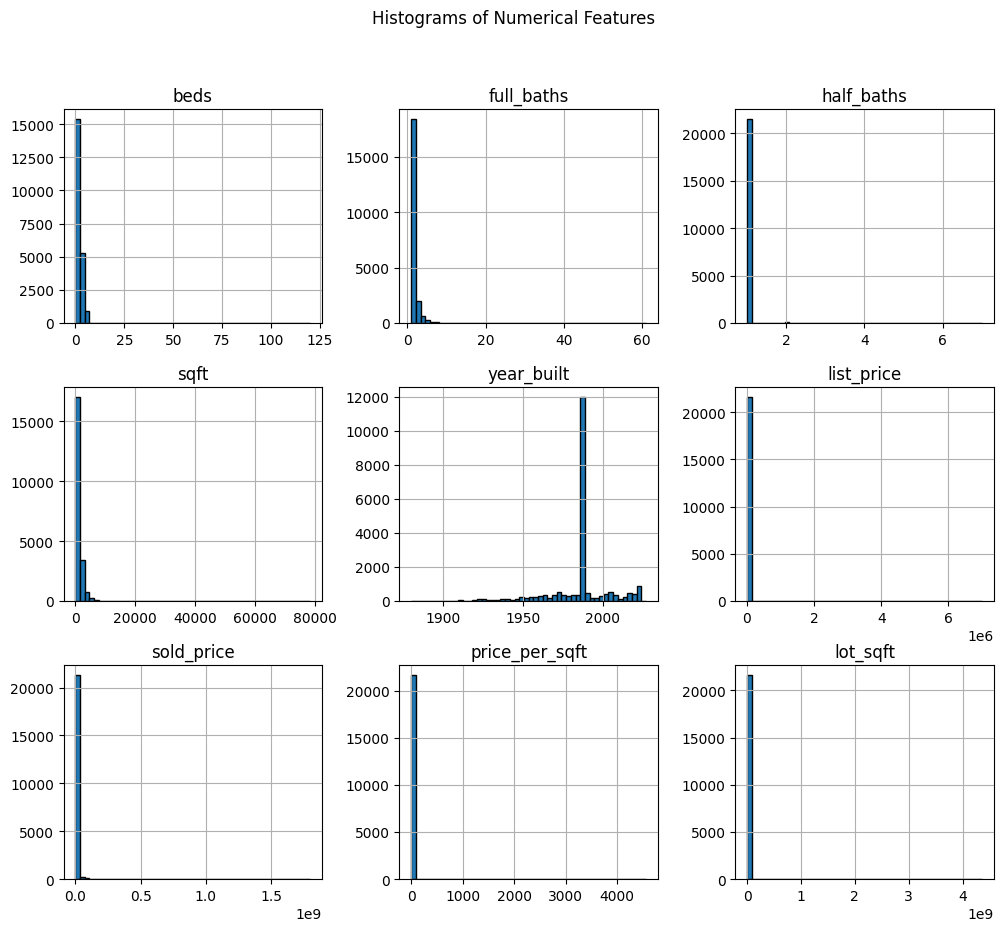

In [10]:
# Step 9: Visualize Distributions of Key Numerical Features
plt.figure(figsize=(12, 6))
df[numeric_cols].hist(figsize=(12, 10), bins=50, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


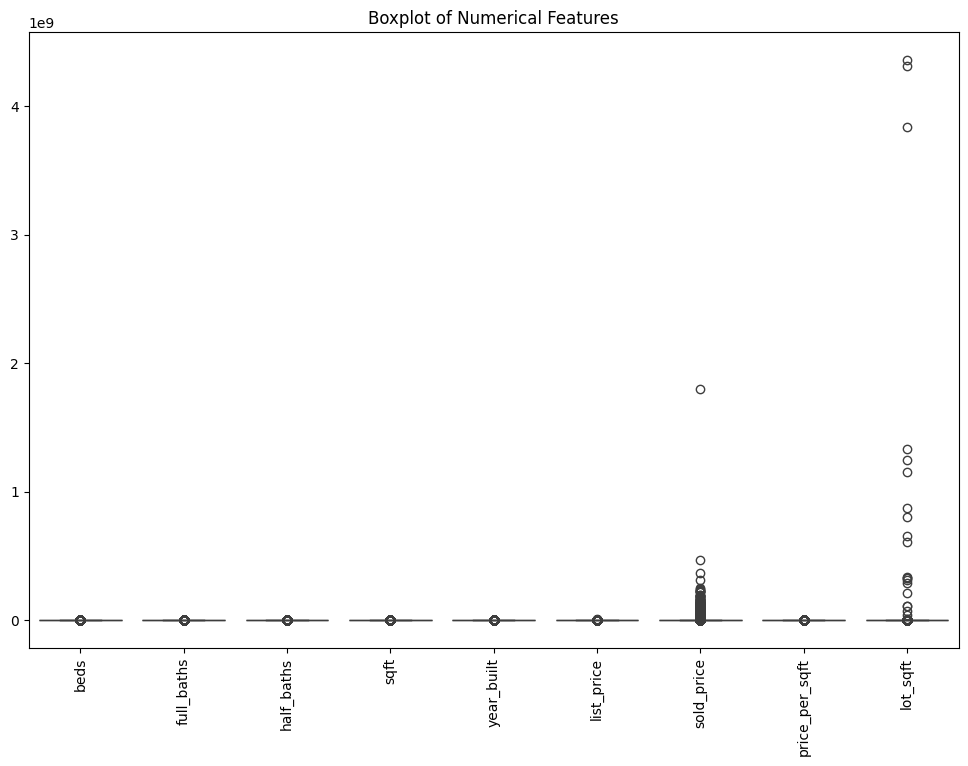

In [11]:
# Step 10: Boxplots to Identify Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()

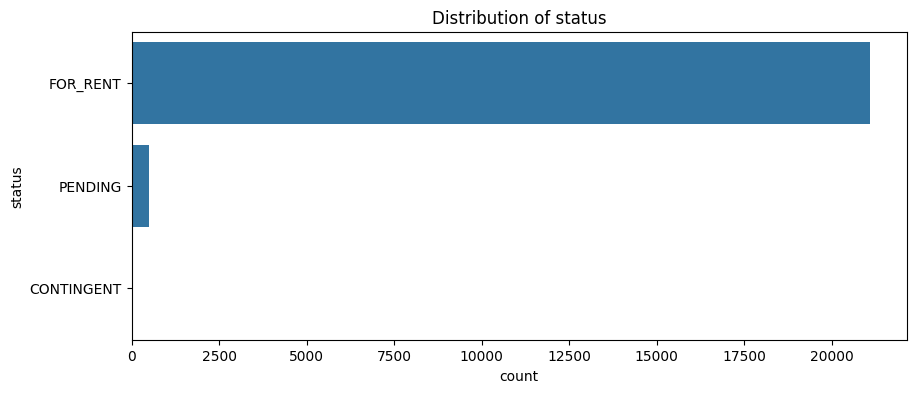

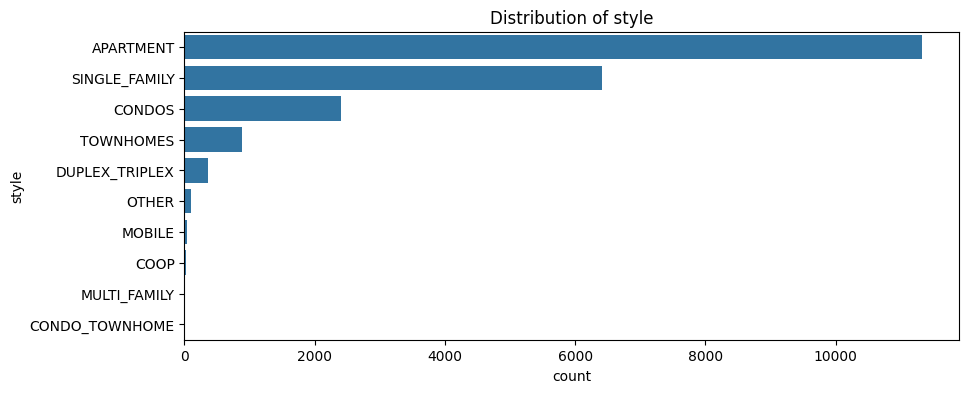

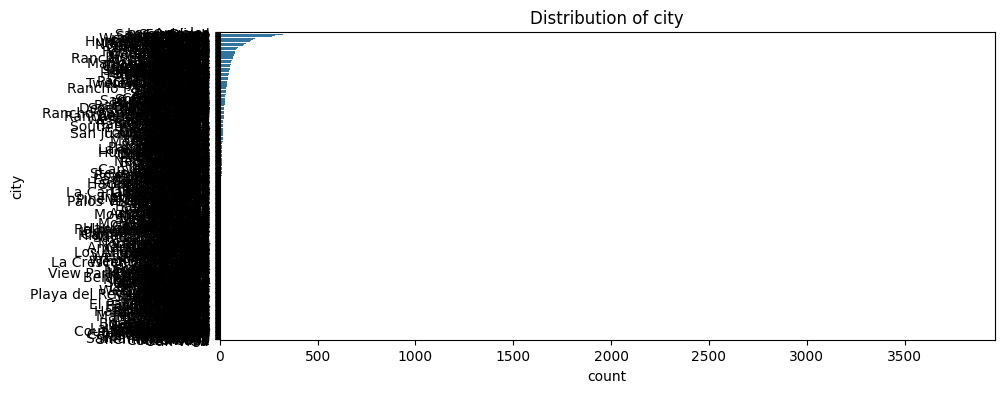

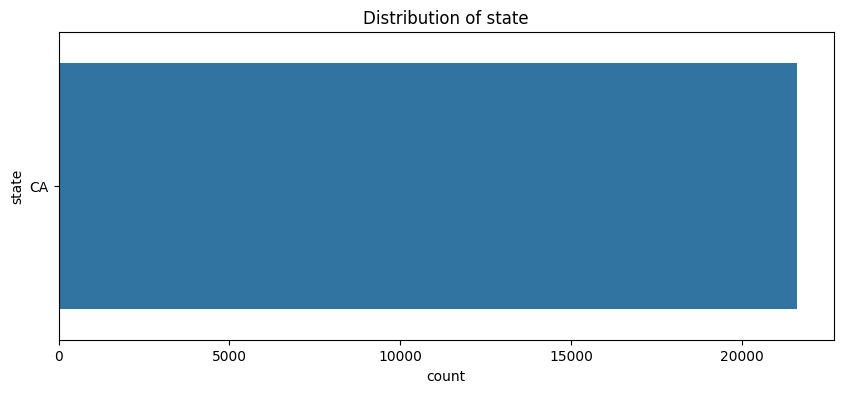

In [12]:
# Step 11: Analyze Categorical Feature Distributions
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

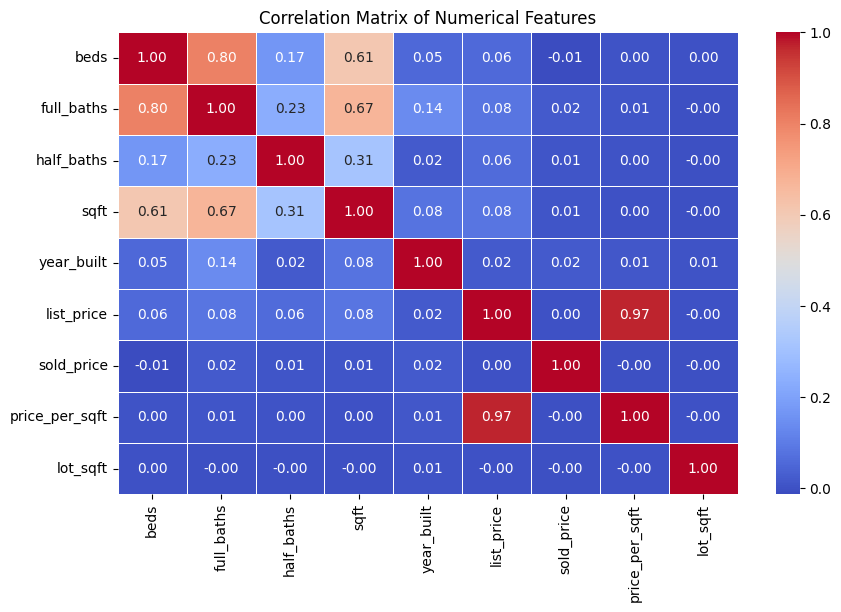

In [13]:
# Step 12: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
# Step : Drop Highly Missing Columns (More than 80% missing)
missing_threshold = 0.8  # 80% threshold
missing_ratio = df.isnull().sum() / len(df)

# Identify columns to drop
cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns with more than 80% missing values.\n")


Dropped 4 columns with more than 80% missing values.



In [15]:
# Select key features for clustering
selected_features = ['beds', 'full_baths', 'sqft', 'year_built',
                     'list_price', 'sold_price', 'price_per_sqft',
                     'lot_sqft', 'latitude', 'longitude']

df_cleaned = df[selected_features]


In [16]:
# Step 5: Normalize Numerical Features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ensure 'latitude' and 'longitude' are numeric
df_cleaned['latitude'] = pd.to_numeric(df_cleaned['latitude'], errors='coerce')
df_cleaned['longitude'] = pd.to_numeric(df_cleaned['longitude'], errors='coerce')

# Now apply scaling
df_cleaned[selected_features] = scaler.fit_transform(df_cleaned[selected_features])

print("Data normalization completed.\n")

Data normalization completed.



<ipython-input-16-23162642b3ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['latitude'] = pd.to_numeric(df_cleaned['latitude'], errors='coerce')
<ipython-input-16-23162642b3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['longitude'] = pd.to_numeric(df_cleaned['longitude'], errors='coerce')
<ipython-input-16-23162642b3ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [17]:
print("Final Cleaned Dataset:")
print(df_cleaned.head())

Final Cleaned Dataset:
       beds  full_baths      sqft  year_built  list_price  sold_price  \
0  0.025000    0.016667  0.018210    0.734694    0.000400    0.000140   
1  0.016667    0.000000  0.011501    0.721088    0.000443    0.000328   
2  0.000000    0.000000  0.007795    0.721088    0.000372    0.000455   
3  0.008333    0.000000  0.011374    0.721088    0.000300    0.000455   
4  0.000000    0.016667  0.015616    0.782313    0.000400    0.000067   

   price_per_sqft  lot_sqft  latitude  longitude  
0        0.000439  0.000002  0.119162   0.820751  
1        0.000658  0.000002  0.131133   0.628157  
2        0.000877  0.000002  0.568233   0.185224  
3        0.000439  0.000002  0.525524   0.243655  
4        0.000439  0.000012  0.128446   0.817980  


In [18]:
df_cleaned.to_csv("cleaned_house_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_house_data.csv'.")

Cleaned dataset saved as 'cleaned_house_data.csv'.


<Figure size 1200x600 with 0 Axes>

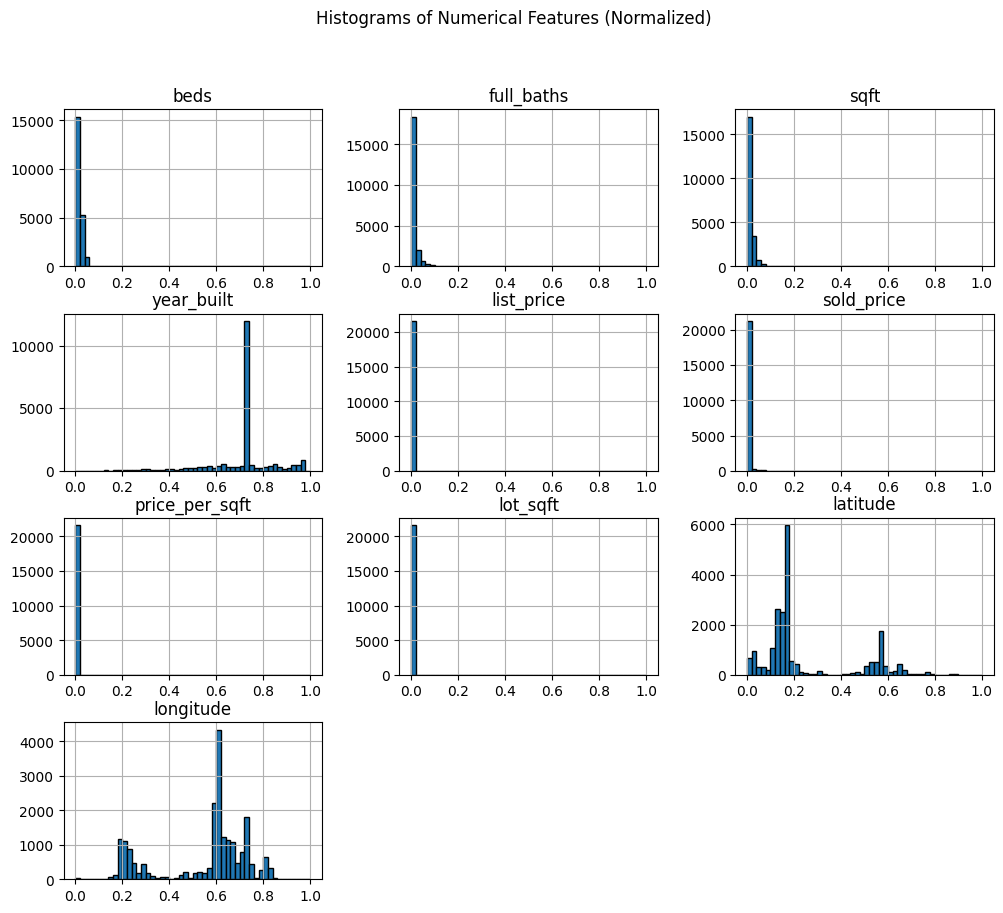

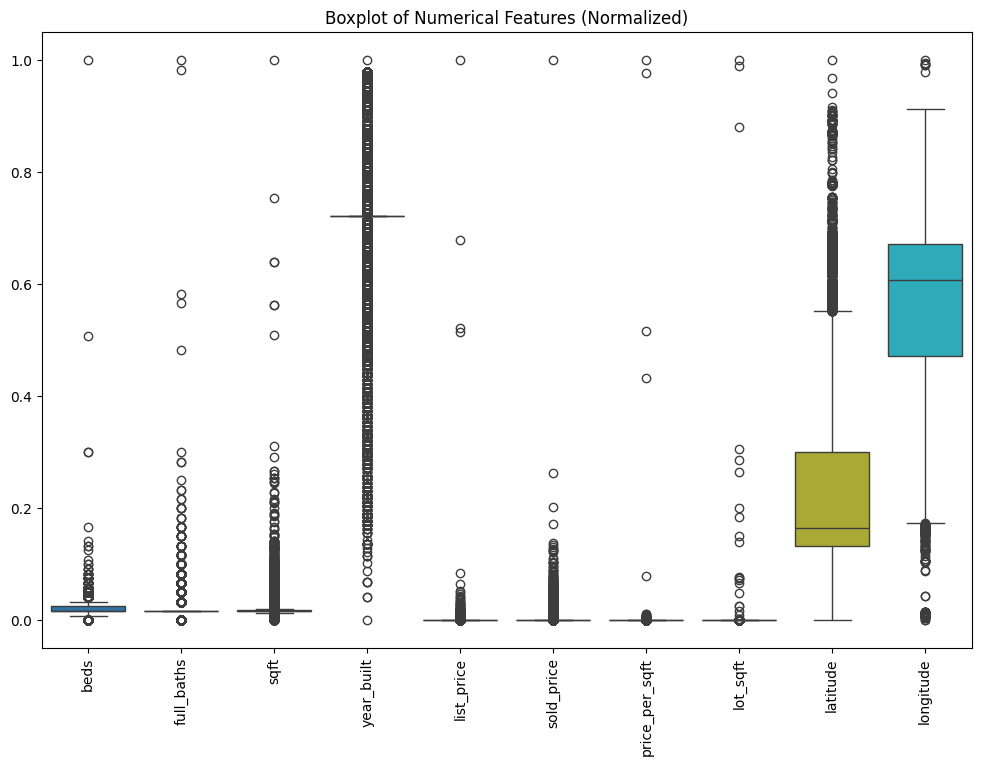

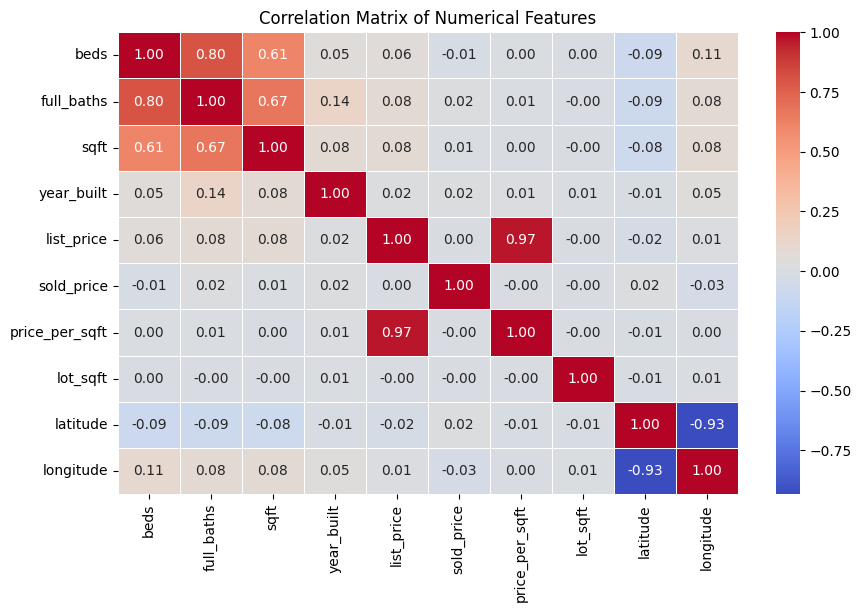

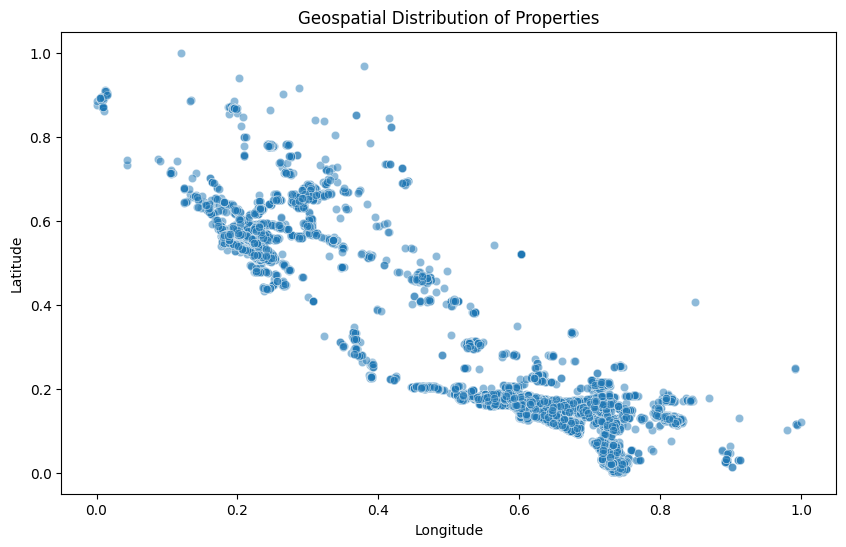

In [19]:
# Step 1: Load Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Cleaned Dataset
df_cleaned = pd.read_csv("cleaned_house_data.csv")

# Step 3: Histograms (Feature Distributions)
plt.figure(figsize=(12, 6))
df_cleaned.hist(figsize=(12, 10), bins=50, edgecolor='black')
plt.suptitle('Histograms of Numerical Features (Normalized)')
plt.show()

# Step 4: Boxplots (Outlier Detection)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features (Normalized)')
plt.show()

# Step 5: Correlation Matrix (Feature Relationships)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 6: Geospatial Scatter Plot (Property Distribution)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Properties')
plt.show()


In [20]:
!pip install kneed

In [21]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.impute import SimpleImputer

In [22]:
df_cleaned = pd.read_csv("cleaned_house_data.csv")

In [23]:
# Step 4: Select Features for Clustering (Adjust Based on Your Goal)
selected_features = ['beds', 'full_baths', 'sqft', 'year_built',
                     'list_price', 'sold_price', 'price_per_sqft',
                     'lot_sqft', 'latitude', 'longitude']

df_cluster = df_cleaned[selected_features]

In [24]:
# Step 5: Standardize Features for Better Clustering
scaler = StandardScaler()
# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
df_imputed = imputer.fit_transform(df_cluster) # Impute missing values
df_scaled = scaler.fit_transform(df_imputed) # Standardize the imputed data


In [25]:
# Step 6: Find Optimal Number of Clusters Using the Elbow Method
sse = []
silhouette_scores = []

k_values = range(2, 11)  # Checking for clusters from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # SSE Calculation
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

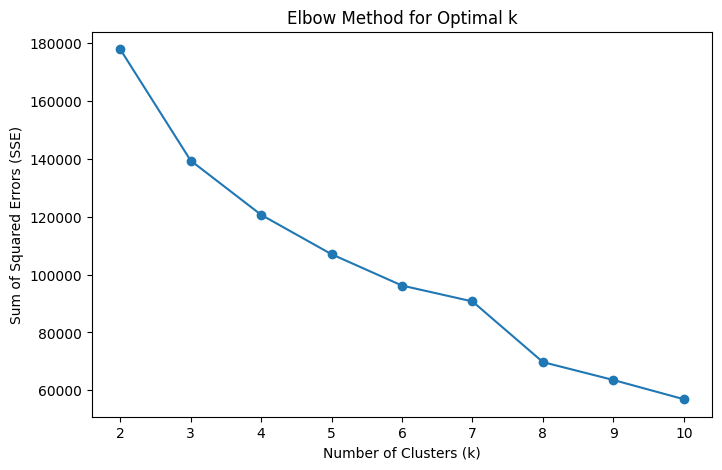

In [26]:
# Step 7: Plot SSE to Find the "Elbow Point"
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [27]:
# Step 8: Determine the Best k Using the KneeLocator
optimal_k = KneeLocator(k_values, sse, curve="convex", direction="decreasing").elbow
print(f"Optimal number of clusters determined by the elbow method: {optimal_k}")


Optimal number of clusters determined by the elbow method: 4


In [28]:
# Step 9: Apply K-Means with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned["Cluster"] = kmeans.fit_predict(df_scaled)

In [29]:

# Step 10: Compute the Final Silhouette Score
final_silhouette = silhouette_score(df_scaled, df_cleaned["Cluster"])
print(f"Final Silhouette Score: {final_silhouette:.4f}")

Final Silhouette Score: 0.4685


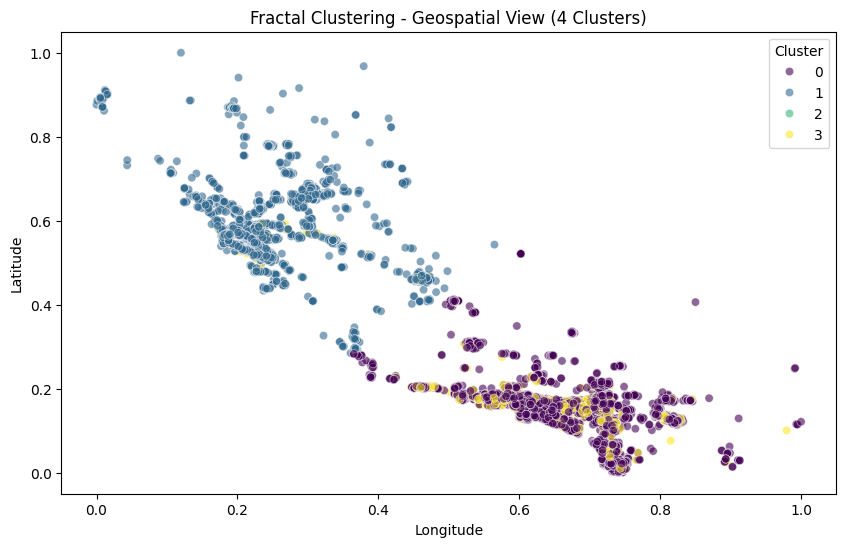

In [30]:
# Step 11: Visualize Clusters (2D Projection Using Latitude & Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['latitude'], hue=df_cleaned['Cluster'], palette='viridis', alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Fractal Clustering - Geospatial View ({optimal_k} Clusters)")
plt.legend(title="Cluster")
plt.show()

In [31]:
# Step 12: Save the Clustered Dataset
df_cleaned.to_csv("fractal_clustered_data.csv", index=False)
print("Fractal clustered dataset saved as 'fractal_clustered_data.csv'.")

Fractal clustered dataset saved as 'fractal_clustered_data.csv'.


In [32]:
# Step 1: Load the Clustered Dataset
df_clustered = pd.read_csv("fractal_clustered_data.csv")

In [33]:
# Function 1: Find Cluster with Highest Average Price
best_high_price_cluster = df_clustered.groupby("Cluster")["list_price"].mean().idxmax()
max_avg_price = df_clustered.groupby("Cluster")["list_price"].mean().max()

print(f"Golden Cluster (Highest Avg Price): Cluster {best_high_price_cluster} with Avg Price: ${max_avg_price:,.2f}")

Golden Cluster (Highest Avg Price): Cluster 2 with Avg Price: $0.68


In [34]:
# Function 2: Find Cluster with Lowest Price Variance
best_low_variance_cluster = df_clustered.groupby("Cluster")["list_price"].var().idxmin()
min_price_variance = df_clustered.groupby("Cluster")["list_price"].var().min()

print(f"Golden Cluster (Lowest Price Variance): Cluster {best_low_variance_cluster} with Variance: ${min_price_variance:,.2f}")

Golden Cluster (Lowest Price Variance): Cluster 1 with Variance: $0.00


<ipython-input-35-140e851f1a3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.mean, palette="viridis")


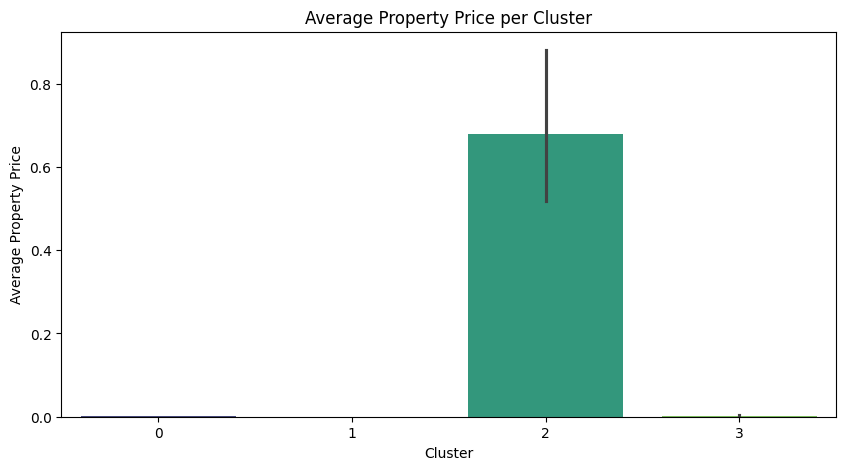

<ipython-input-35-140e851f1a3d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.var, palette="coolwarm")


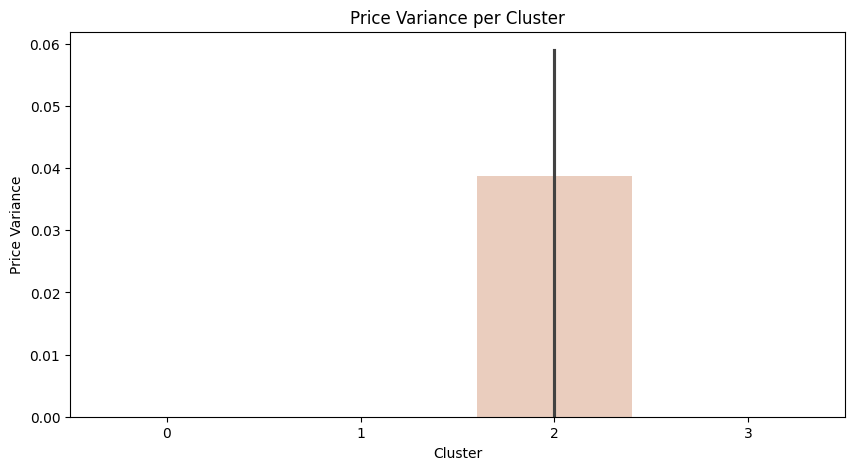

In [35]:
# Step 3: Visualize Clusters Based on Pricing

plt.figure(figsize=(10, 5))
sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.mean, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Average Property Price")
plt.title("Average Property Price per Cluster")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], estimator=np.var, palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Price Variance")
plt.title("Price Variance per Cluster")
plt.show()

<ipython-input-36-9f622dd67201>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clustered["Cluster"], palette="viridis")


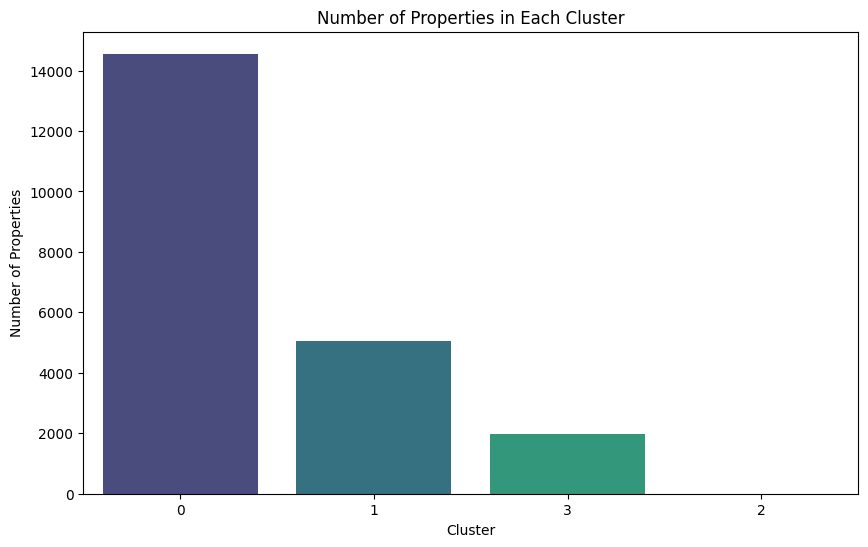

<ipython-input-36-9f622dd67201>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], palette="coolwarm")


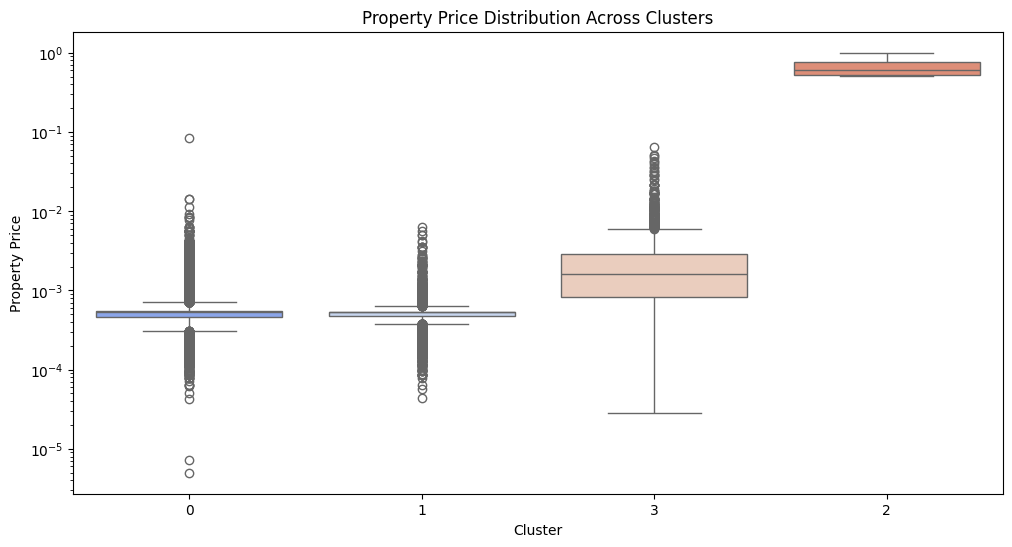

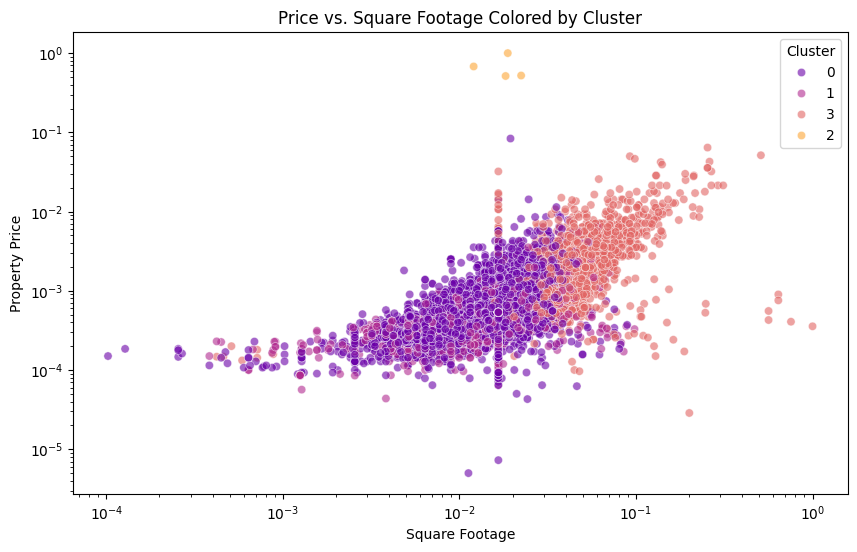

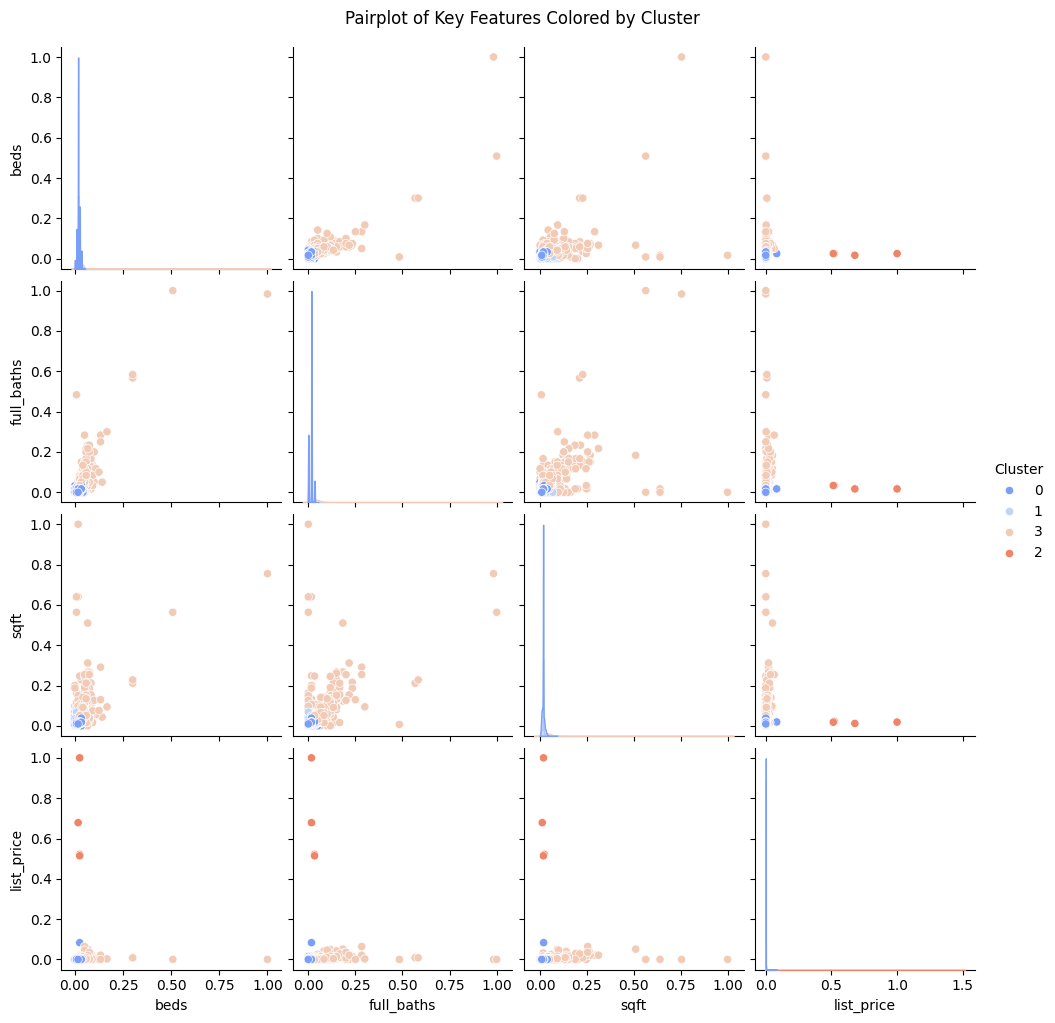

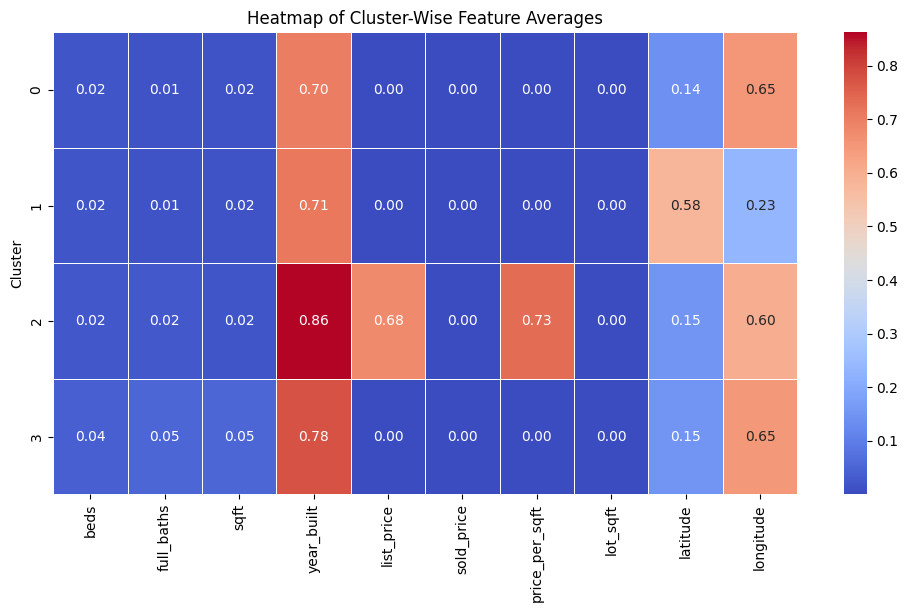

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Reload the dataset
file_path = "/content/fractal_clustered_data.csv"
df_clustered = pd.read_csv(file_path)

# Ensure Cluster is treated as categorical
df_clustered["Cluster"] = df_clustered["Cluster"].astype(str)

# Step 1: Visualize Cluster Distributions
plt.figure(figsize=(10, 6))
sns.countplot(x=df_clustered["Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Properties")
plt.title("Number of Properties in Each Cluster")
plt.show()

# Step 2: Boxplot of Prices Across Clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clustered["Cluster"], y=df_clustered["list_price"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Property Price")
plt.title("Property Price Distribution Across Clusters")
plt.yscale("log")  # Log scale for better visualization of price ranges
plt.show()

# Step 3: Scatter Plot of Price vs. Square Footage Colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clustered["sqft"], y=df_clustered["list_price"], hue=df_clustered["Cluster"], palette="plasma", alpha=0.6)
plt.xlabel("Square Footage")
plt.ylabel("Property Price")
plt.title("Price vs. Square Footage Colored by Cluster")
plt.xscale("log")  # Log scale for better distribution
plt.yscale("log")
plt.show()

# Step 4: Pairplot for Feature Relationships
sns.pairplot(df_clustered, vars=['beds', 'full_baths', 'sqft', 'list_price'], hue="Cluster", palette="coolwarm")
plt.suptitle("Pairplot of Key Features Colored by Cluster", y=1.02)
plt.show()

# Step 5: Heatmap Showing Cluster-Wise Feature Averages
plt.figure(figsize=(12, 6))
sns.heatmap(df_clustered.groupby("Cluster").mean(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Cluster-Wise Feature Averages")
plt.show()


In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Handle Missing Values
df_clustered_features = df_clustered[['beds', 'full_baths', 'sqft', 'year_built',
                                      'list_price', 'sold_price', 'price_per_sqft',
                                      'lot_sqft', 'latitude', 'longitude']]

# Fill missing values with the median of each column
df_clustered_features.fillna(df_clustered_features.median(), inplace=True)

<ipython-input-37-4e3ee11ae25f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered_features.fillna(df_clustered_features.median(), inplace=True)


In [38]:
# Step 2: Compute SSE (Sum of Squared Errors)
optimal_k = df_clustered["Cluster"].nunique()  # Get the number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_clustered_features)

sse = kmeans.inertia_  # SSE Calculation
print(f"Sum of Squared Errors (SSE) for {optimal_k} clusters: {sse:.2f}")

Sum of Squared Errors (SSE) for 4 clusters: 332.31


In [39]:
# Step 3: Compute Silhouette Score
silhouette_avg = silhouette_score(df_clustered_features, df_clustered["Cluster"].astype(int))
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")


Silhouette Score for 4 clusters: 0.3251


In [40]:
# Step 1: Find Cluster with Highest Average Property Price
best_high_price_cluster = df_clustered.groupby("Cluster")["list_price"].mean().idxmax()
max_avg_price = df_clustered.groupby("Cluster")["list_price"].mean().max()

print(f"Golden Cluster (Highest Avg Price): Cluster {best_high_price_cluster} with Avg Price: ${max_avg_price:,.2f}")

# Step 1: Find Cluster with Highest Average Property Price
best_high_price_cluster = df_clustered.groupby("Cluster")["list_price"].mean().idxmax()
max_avg_price = df_clustered.groupby("Cluster")["list_price"].mean().max()

print(f"Golden Cluster (Highest Avg Price): Cluster {best_high_price_cluster} with Avg Price: ${max_avg_price:,.2f}")

# Step 2: Find Cluster with Lowest Price Variance
best_low_variance_cluster = df_clustered.groupby("Cluster")["list_price"].var().idxmin()
min_price_variance = df_clustered.groupby("Cluster")["list_price"].var().min()

Golden Cluster (Highest Avg Price): Cluster 2 with Avg Price: $0.68
Golden Cluster (Highest Avg Price): Cluster 2 with Avg Price: $0.68


### Using the elbow and the recursive methods

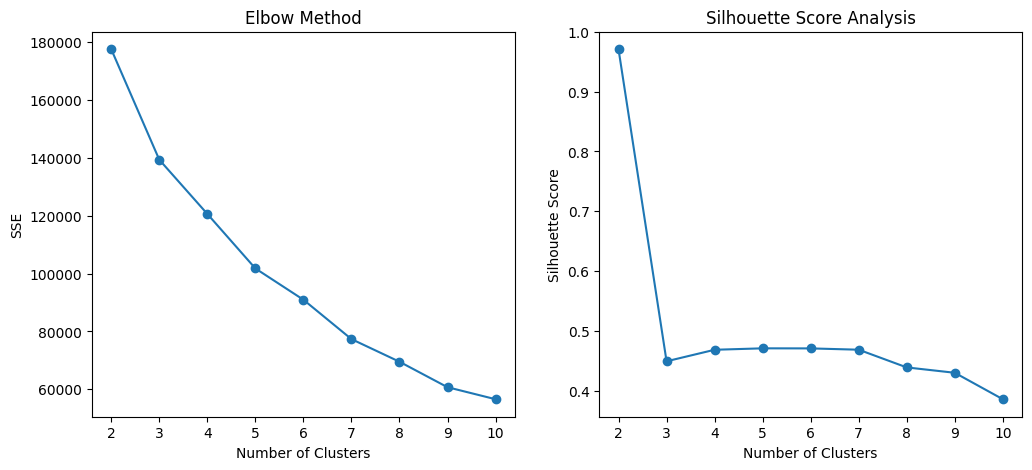

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def elbow_method(data, max_k=10):
    sse = []
    silhouette_scores = []
    k_values = range(2, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis')

    plt.show()

    return k_values[np.argmax(silhouette_scores)]

def recursive_clustering(data, depth=2, min_variance=0.1):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    clusters = {}
    def cluster_recursively(subset, level=0):
        if level >= depth or np.var(subset) < min_variance:
            return subset

        optimal_k = elbow_method(subset)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(subset)

        clustered_data = {}
        for cluster in range(optimal_k):
            clustered_data[cluster] = subset[labels == cluster]
            clusters[f'Level_{level}_Cluster_{cluster}'] = clustered_data[cluster]
            cluster_recursively(clustered_data[cluster], level + 1)

    cluster_recursively(data_scaled)
    return clusters

optimal_k = elbow_method(df_scaled)
refined_clusters = recursive_clustering(df_scaled, depth=3)


### Extra Credit

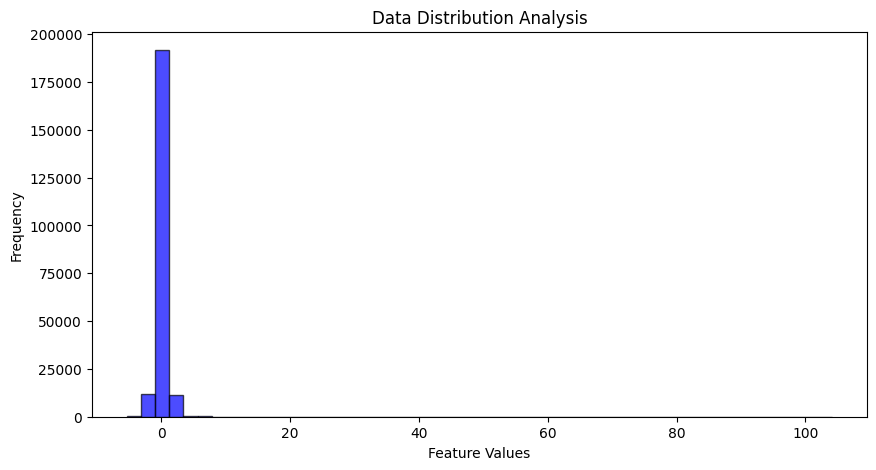

Skewness & Kurtosis Analysis Needed for Algorithm Selection


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import pdist, squareform

def fractal_distance(X):
    # Compute pairwise distances using a modified fractal metric
    return squareform(pdist(X, metric='minkowski', p=1.5))  # Adjust p for fractal scaling

def elbow_method_fractal(data, max_k=10):
    sse = []
    silhouette_scores = []
    k_values = range(2, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(fractal_distance(data))
        sse.append(kmeans.inertia_)
        if len(set(kmeans.labels_)) > 1:
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
        else:
            silhouette_scores.append(-1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method with Fractal Distance')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis with Fractal Distance')

    plt.show()

    return k_values[np.argmax(silhouette_scores)]

def analyze_distribution(data):
    plt.figure(figsize=(10, 5))
    plt.hist(data.flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Feature Values')
    plt.ylabel('Frequency')
    plt.title('Data Distribution Analysis')
    plt.show()

    print("Skewness & Kurtosis Analysis Needed for Algorithm Selection")

def fractal_clustering(data):
    fractal_distances = fractal_distance(data)

    clustering = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
    labels = clustering.fit_predict(fractal_distances)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
    plt.title('Fractal Clustering with DBSCAN')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return labels

def recursive_clustering(data, depth=3, min_size=5):
    if depth == 0 or len(data) < min_size:
        return [(-1, data)]  # Stop if depth limit is reached or not enough data

    optimal_k = elbow_method_fractal(data, max_k=min(len(data), 10))
    if optimal_k < 2:
        return [(-1, data)]  # Avoid clustering if only one cluster is detected

    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(fractal_distance(data))

    clusters = []
    for cluster_id in range(optimal_k):
        sub_data = data[labels == cluster_id]
        if len(sub_data) > min_size:
            clusters.extend(recursive_clustering(sub_data, depth - 1, min_size))
        else:
            clusters.append((cluster_id, sub_data))

    return clusters

analyze_distribution(df_scaled)
optimal_k = elbow_method_fractal(df_scaled)
fractal_labels = fractal_clustering(df_scaled)
refined_clusters = recursive_clustering(df_scaled, depth=3)